## Evaluation Metrixs for Classification

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('data_week_3.csv')

df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)

In [4]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [5]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [6]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [7]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

np.float64(0.8026969481902059)

## Accuracy and Dummy Model

- Evaluate model on different thresholds
- Check the accuracy of dummy baselines

In [8]:
len(y_val)

1409

In [9]:
#Correct decisions
(y_val == churn_decision).sum()

np.int64(1131)

In [10]:
accuracy = ((y_val == churn_decision).sum())/len(y_val)
accuracy

np.float64(0.8026969481902059)

In [11]:
# Create thresholds and gauge which one will give us the best accuracy
thresholds = np.linspace(0,1,21)
scores = []

for t in thresholds:
    churn_decision = (y_pred >= t)
    score = (y_val == churn_decision).mean()
    print(f'Accuracy = {score:.3f}, t = {t:.2f}')
    scores.append(score)

Accuracy = 0.274, t = 0.00
Accuracy = 0.508, t = 0.05
Accuracy = 0.591, t = 0.10
Accuracy = 0.666, t = 0.15
Accuracy = 0.709, t = 0.20
Accuracy = 0.737, t = 0.25
Accuracy = 0.760, t = 0.30
Accuracy = 0.773, t = 0.35
Accuracy = 0.785, t = 0.40
Accuracy = 0.792, t = 0.45
Accuracy = 0.803, t = 0.50
Accuracy = 0.801, t = 0.55
Accuracy = 0.795, t = 0.60
Accuracy = 0.786, t = 0.65
Accuracy = 0.766, t = 0.70
Accuracy = 0.744, t = 0.75
Accuracy = 0.734, t = 0.80
Accuracy = 0.726, t = 0.85
Accuracy = 0.726, t = 0.90
Accuracy = 0.726, t = 0.95
Accuracy = 0.726, t = 1.00


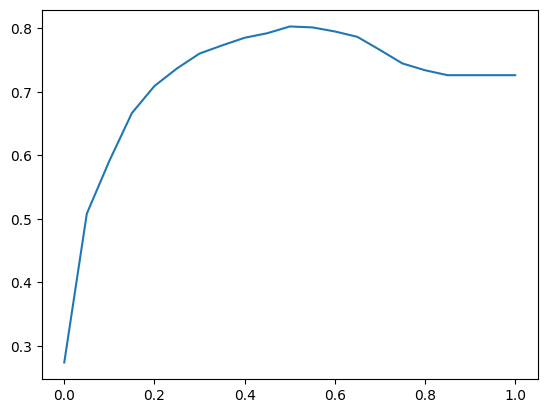

In [12]:
plt.plot(thresholds,scores)

Using the Scikitlearn module to test accuracies

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
accuracy_score(y_val,churn_decision)

0.7260468417317246

In [15]:
#Running the previous threshold checks with scikit learns accuracy score
for t in thresholds:
    score = accuracy_score(y_val,y_pred >= t)
    print(f'Accuracy = {score:.3f}, t = {t:.2f}')
    scores.append(score)

Accuracy = 0.274, t = 0.00
Accuracy = 0.508, t = 0.05
Accuracy = 0.591, t = 0.10
Accuracy = 0.666, t = 0.15
Accuracy = 0.709, t = 0.20
Accuracy = 0.737, t = 0.25
Accuracy = 0.760, t = 0.30
Accuracy = 0.773, t = 0.35
Accuracy = 0.785, t = 0.40
Accuracy = 0.792, t = 0.45
Accuracy = 0.803, t = 0.50
Accuracy = 0.801, t = 0.55
Accuracy = 0.795, t = 0.60
Accuracy = 0.786, t = 0.65
Accuracy = 0.766, t = 0.70
Accuracy = 0.744, t = 0.75
Accuracy = 0.734, t = 0.80
Accuracy = 0.726, t = 0.85
Accuracy = 0.726, t = 0.90
Accuracy = 0.726, t = 0.95
Accuracy = 0.726, t = 1.00


In [16]:
from collections import Counter

In [17]:
Counter(y_pred >= 1.0)

Counter({np.False_: 1409})

##### Dummy baseline
the dataset is imbalanced, and we don’t have many churned users.
So, the dummy model can always predict the majority class — “no churn.” In other
words, this model will always output False, regardless of the features. This is not a
super useful model, but we can use it as a baseline and compare it with the other two
models.


In [19]:
size_val = len(y_val)
baseline = np.repeat(False,size_val)

In [20]:
accuracy_score(baseline,y_val)

0.7260468417317246

Accuracy of baseline is about 73%

According to accuracy, our model is only slightly better than a dummy model that treats all the customers as nonchurning and doesn’t attempt to keep any of them.

### Confusion Table

Even though accuracy is easy to understand, it’s not always the best metric. In fact,
it sometimes can be misleading. We’ve already seen this occur: the accuracy of our
model is 80%, and although that seems like a good number, it’s just 7% better than
the accuracy of a dummy model that always outputs the same prediction of “no
churn.”

This situation typically happens when we have a class imbalance (more instances of
one class than another). We know that this is definitely the case for our problem: 73%
of customers did not churn, and only 27% did churn.

For such cases, we need a different way of measuring the quality of our models. We
have a few options, and most of them are based on the confusion table: a table that
concisely represents every possible outcome for our model’s predictions.